In [214]:
import pandas as pd
import matplotlib.pyplot as plt
import requests

In [ ]:
data_files = ["https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"]
for file in data_files:
    r = requests.get(file, allow_redirects=True)
    open(file.rsplit('/', 1)[1], 'wb').overwrite(r.content)

In [215]:
data = pd.read_csv("./owid-covid-data.csv",parse_dates=['date'])
data.set_index('date', inplace=True)

In [216]:
data.columns

Index(['iso_code', 'continent', 'location', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vac

In [217]:
data[data['iso_code'] == "DEU"].head(20)

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,
2020-01-27,DEU,Europe,Germany,1.0,1.0,NaN,NaN,NaN,NaN,0.012,...,28.2,33.1,NaN,8.0,81.33,0.947,NaN,NaN,NaN,NaN
2020-01-28,DEU,Europe,Germany,4.0,3.0,NaN,NaN,NaN,NaN,0.048,...,28.2,33.1,NaN,8.0,81.33,0.947,NaN,NaN,NaN,NaN
2020-01-29,DEU,Europe,Germany,4.0,0.0,NaN,NaN,NaN,NaN,0.048,...,28.2,33.1,NaN,8.0,81.33,0.947,NaN,NaN,NaN,NaN
2020-01-30,DEU,Europe,Germany,4.0,0.0,NaN,NaN,NaN,NaN,0.048,...,28.2,33.1,NaN,8.0,81.33,0.947,NaN,NaN,NaN,NaN
2020-01-31,DEU,Europe,Germany,5.0,1.0,NaN,NaN,NaN,NaN,0.060,...,28.2,33.1,NaN,8.0,81.33,0.947,NaN,NaN,NaN,NaN
2020-02-01,DEU,Europe,Germany,8.0,3.0,1.143,NaN,NaN,NaN,0.095,...,28.2,33.1,NaN,8.0,81.33,0.947,NaN,NaN,NaN,NaN
2020-02-02,DEU,Europe,Germany,10.0,2.0,1.429,NaN,NaN,NaN,0.119,...,28.2,33.1,NaN,8.0,81.33,0.947,-4767.9,-4.74,-5.22,-56.828048
2020-02-03,DEU,Europe,Germany,12.0,2.0,1.571,NaN,NaN,NaN,0.143,...,28.2,33.1,NaN,8.0,81.33,0.947,NaN,NaN,NaN,NaN
2020-02-04,DEU,Europe,Germany,12.0,0.0,1.143,NaN,NaN,NaN,0.143,...,28.2,33.1,NaN,8.0,81.33,0.947,NaN,NaN,NaN,NaN


In [218]:
interesting_colums = ["new_cases", "new_cases_smoothed", "new_cases_smoothed_per_million",
                      "new_deaths", "new_deaths_smoothed", "new_deaths_smoothed_per_million", "total_cases_per_million", "total_deaths_per_million", "mortality_rate"]
country_codes = ["SVK", "CZE", "DEU", "SWE", "USA"]

data['mortality_rate'] = data['total_deaths_per_million'] / data['total_cases_per_million']

slovakia = data[data['iso_code'] == "SVK"][interesting_colums]
czech_republic = data[data['iso_code'] == "CZE"][interesting_colums]
germany = data[data['iso_code'] == "DEU"][interesting_colums]
sweden = data[data['iso_code'] == "SWE"][interesting_colums]
usa = data[data['iso_code'] == "USA"][interesting_colums]

countries_combined = pd.concat(
    [slovakia.add_prefix("SVK_"),
     czech_republic.add_prefix("CZE_"),
     germany.add_prefix("DEU_"),
     usa.add_prefix("USA_"),
     sweden.add_prefix("SWE_")],
    axis=1)


In [219]:
countries_combined.tail()

,SVK_new_cases,SVK_new_cases_smoothed,SVK_new_cases_smoothed_per_million,SVK_new_deaths,SVK_new_deaths_smoothed,SVK_new_deaths_smoothed_per_million,SVK_total_cases_per_million,SVK_total_deaths_per_million,SVK_mortality_rate,CZE_new_cases,...,USA_mortality_rate,SWE_new_cases,SWE_new_cases_smoothed,SWE_new_cases_smoothed_per_million,SWE_new_deaths,SWE_new_deaths_smoothed,SWE_new_deaths_smoothed_per_million,SWE_total_cases_per_million,SWE_total_deaths_per_million,SWE_mortality_rate
date,,,,,,,,,,,,,,,,,,,,,
2022-02-21,9422.0,19992.286,3668.801,12.0,21.000,3.854,368868.674,3349.439,0.009080,17793.0,...,0.011927,0.0,3646.571,358.909,0.0,50.143,4.935,238466.347,1658.635,0.006955
2022-02-22,15581.0,19142.857,3512.921,27.0,22.286,4.090,371727.956,3354.394,0.009024,0.0,...,0.011940,8509.0,3183.429,313.325,81.0,50.571,4.977,239303.834,1666.608,0.006964
2022-02-23,26614.0,18872.857,3463.373,35.0,24.143,4.430,376611.913,3360.817,0.008924,14353.0,...,0.011963,3418.0,2902.857,285.710,131.0,49.714,4.893,239640.246,1679.501,0.007008
2022-02-24,19112.0,18324.429,3362.731,24.0,22.714,4.168,380119.172,3365.221,0.008853,11257.0,...,0.011990,3067.0,2755.714,271.227,19.0,45.000,4.429,239942.111,1681.371,0.007007
2022-02-25,12591.0,17078.857,3134.155,37.0,24.857,4.562,382429.757,3372.011,0.008817,10081.0,...,0.012010,3292.0,2612.286,257.111,59.0,41.429,4.078,240266.122,1687.178,0.007022


<AxesSubplot:title={'center':'Slovensko - Počet prípadov ochorenia'}, xlabel='date'>

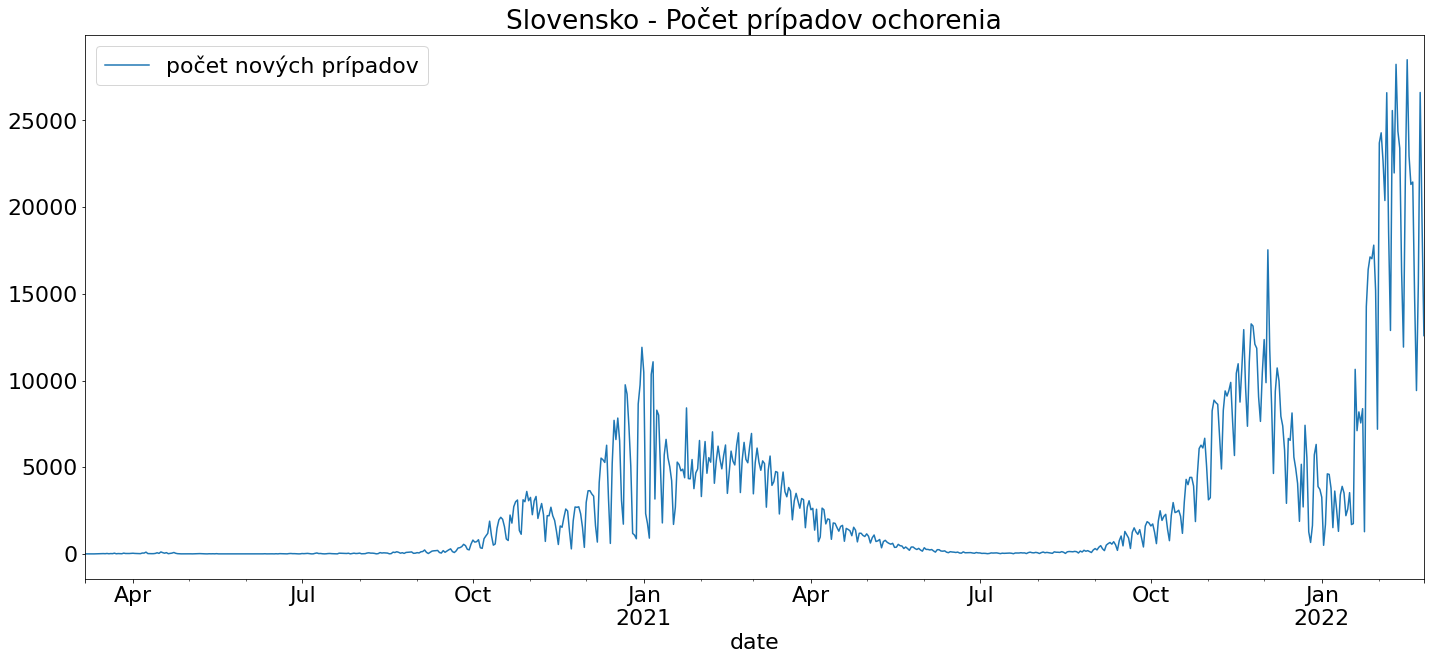

In [220]:
slovakia.plot( y = ['new_cases'],figsize=(24, 10), title="Slovensko - Počet prípadov ochorenia", label=["počet nových prípadov"])

In [221]:
plt.figure()
plt.rcParams.update({'font.size': 22}) # must set in top


<Figure size 432x288 with 0 Axes>

<AxesSubplot:title={'center':'Slovensko - Počet prípadov ochorenia (vyhladené)'}, xlabel='date'>

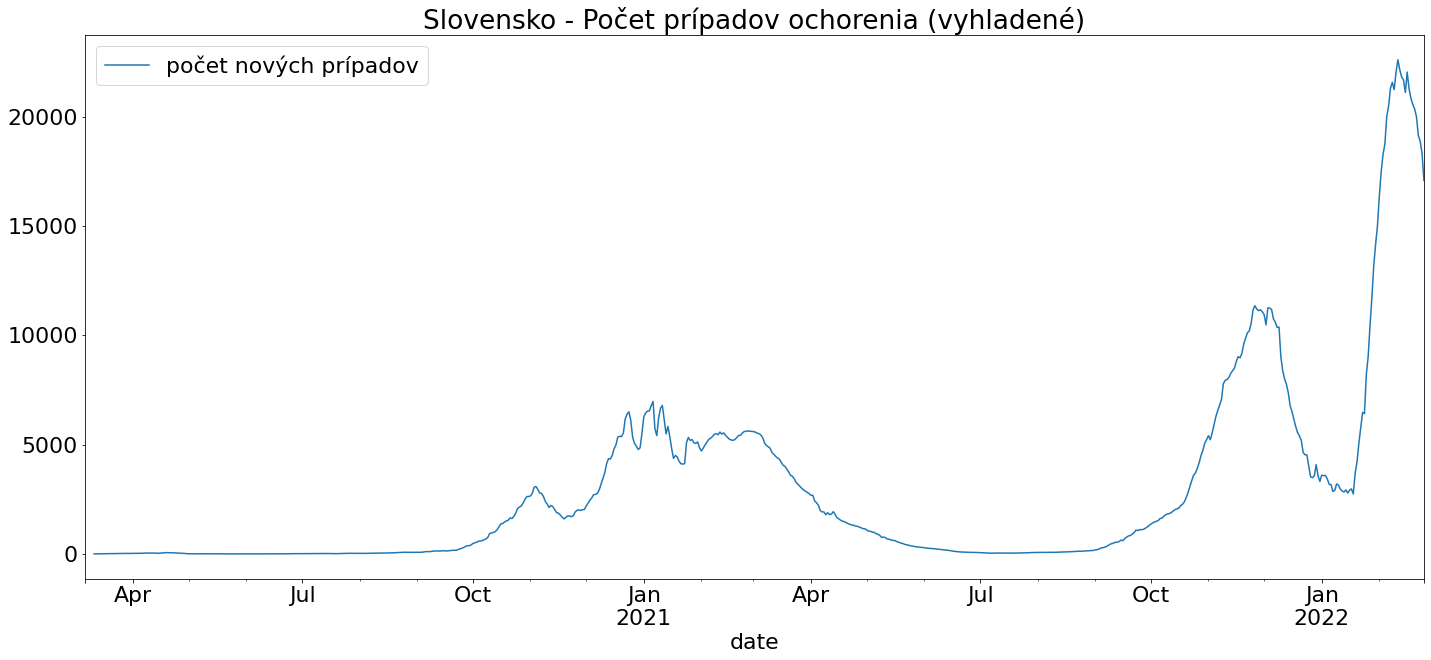

In [222]:
slovakia.plot( y = ['new_cases_smoothed'],figsize=(24, 10),
title="Slovensko - Počet prípadov ochorenia (vyhladené)",
label=["počet nových prípadov"])

<AxesSubplot:title={'center':'Slovensko - počet prípadov a úmrtí'}, xlabel='date'>

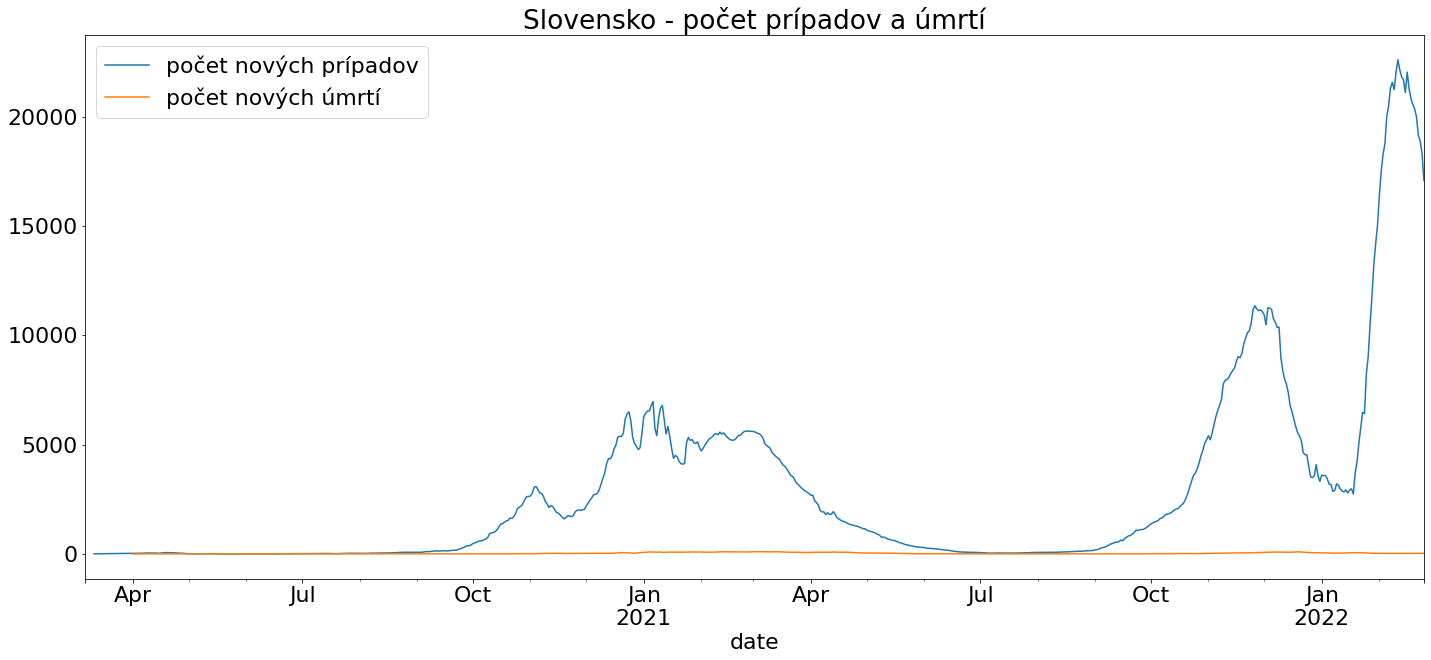

In [235]:
slovakia.plot( y = ['new_cases_smoothed','new_deaths_smoothed'], figsize=(24, 10),  
title="Slovensko - počet prípadov a úmrtí",
label=["počet nových prípadov", "počet nových úmrtí"], subplots=False)


array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>], dtype=object)

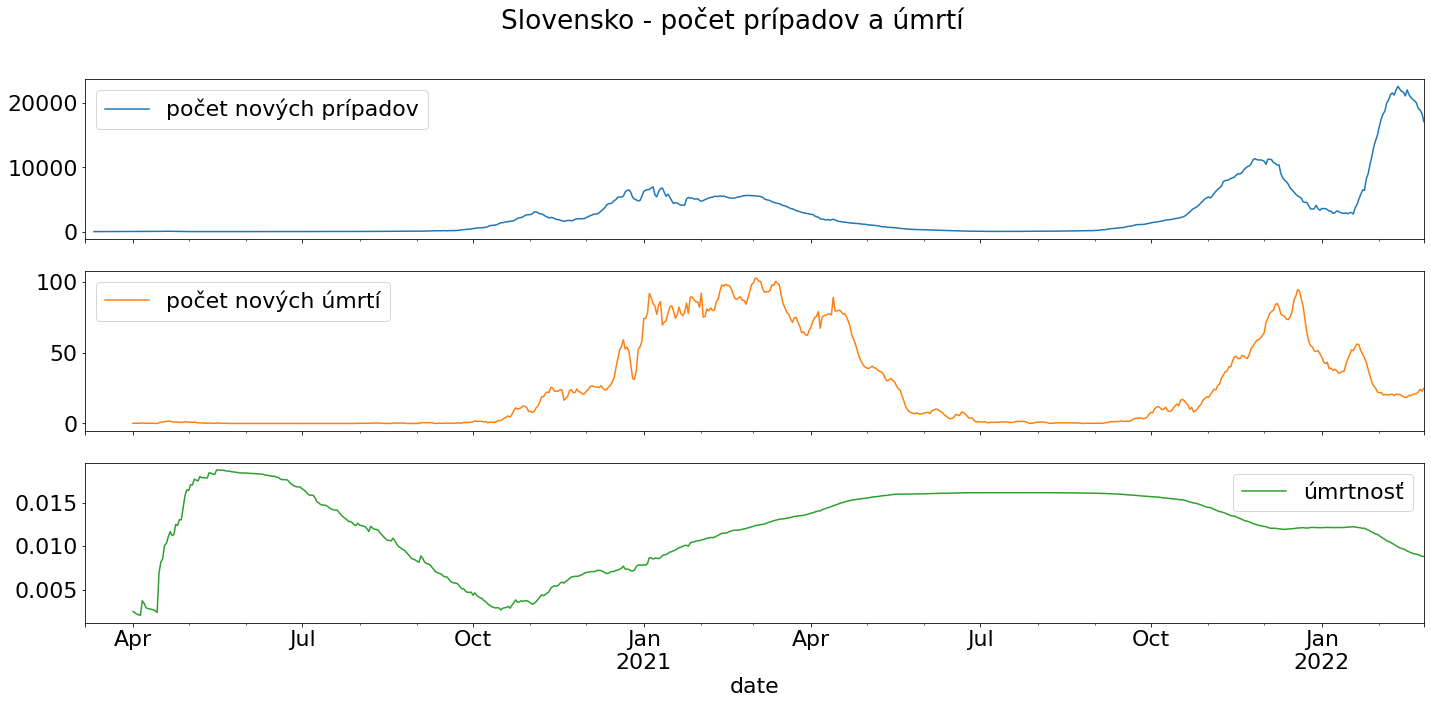

In [224]:
slovakia.plot( y = ['new_cases_smoothed','new_deaths_smoothed','mortality_rate'], figsize=(24, 10),
  title="Slovensko - počet prípadov a úmrtí",label=["počet nových prípadov", "počet nových úmrtí", 'úmrtnosť'], subplots=True)


<AxesSubplot:title={'center':'Slovensko - úmrtnosť'}, xlabel='date'>

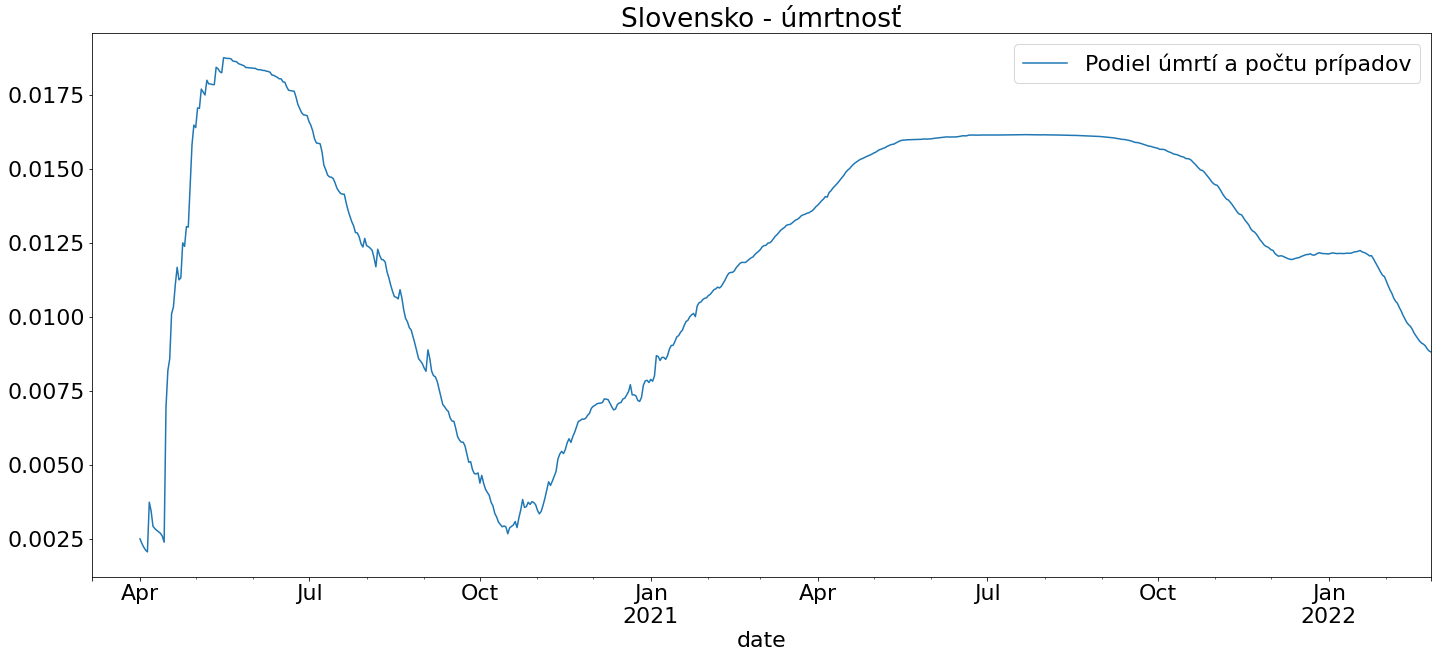

In [225]:
slovakia.plot( y = ['mortality_rate'], figsize=(24, 10),  title="Slovensko - úmrtnosť",label=["Podiel úmrtí a počtu prípadov"])


<AxesSubplot:title={'center':'Slovensko - počet prípadov a úmrtí'}, xlabel='date'>

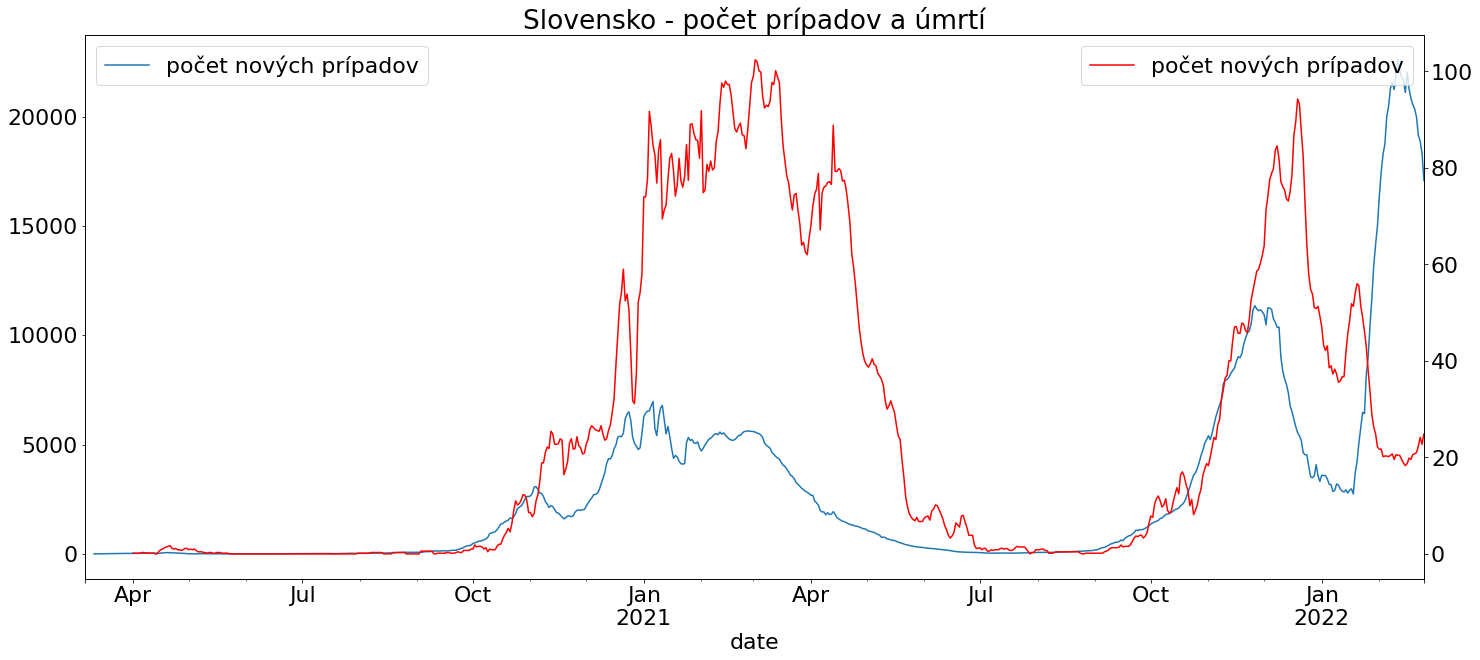

In [226]:
ax1 = slovakia.plot( y = ['new_cases_smoothed'], figsize=(24, 10), label=["počet nových prípadov"])
ax2 = ax1.twinx()
ax2.spines['right'].set_position(('axes', 1))
slovakia.plot( y = ['new_deaths_smoothed'], figsize=(24, 10),color="red", ax=ax2, title="Slovensko - počet prípadov a úmrtí", label=["počet nových prípadov"])

<AxesSubplot:title={'center':'Cases in several countries'}, xlabel='date'>

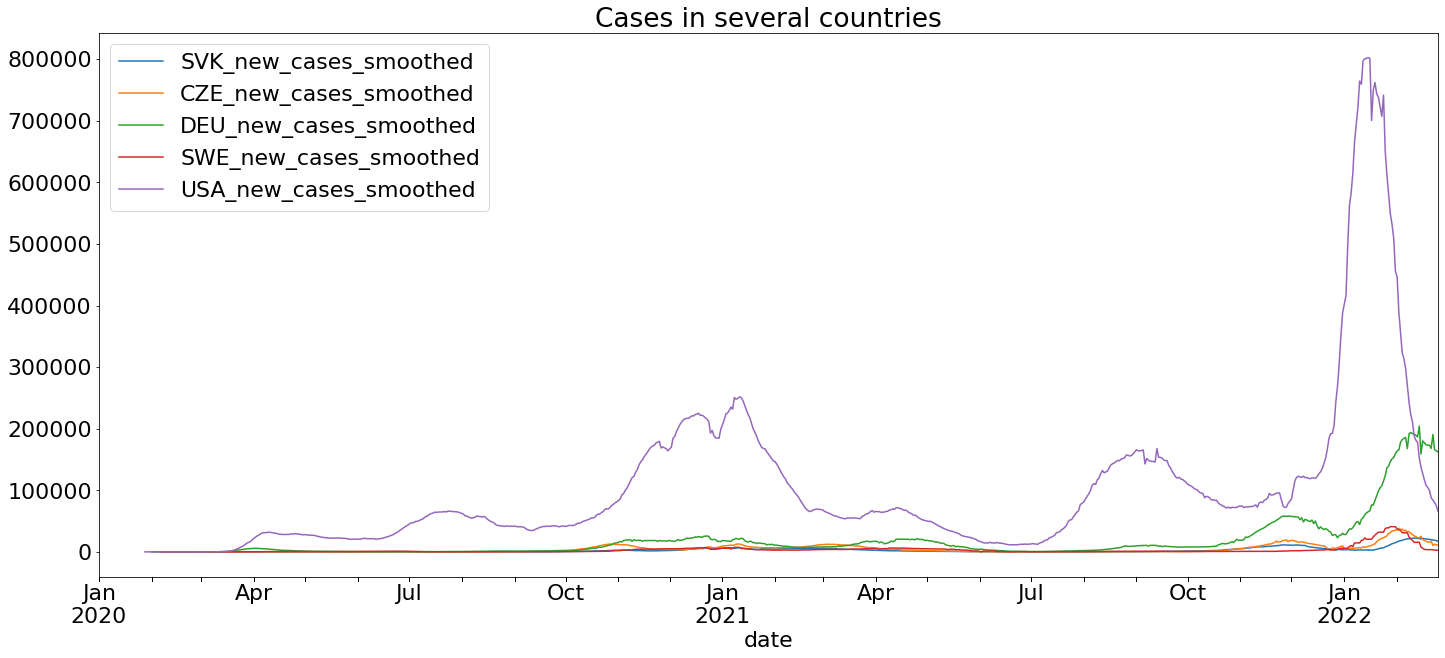

In [227]:
countries_combined.plot( 
    y = [ code + "_new_cases_smoothed" for code in country_codes 
    ], 
    figsize=(24, 10), 
    xticks=countries_combined.index.strftime('%m-%Y'),
    title="Cases in several countries"
    )

array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>], dtype=object)

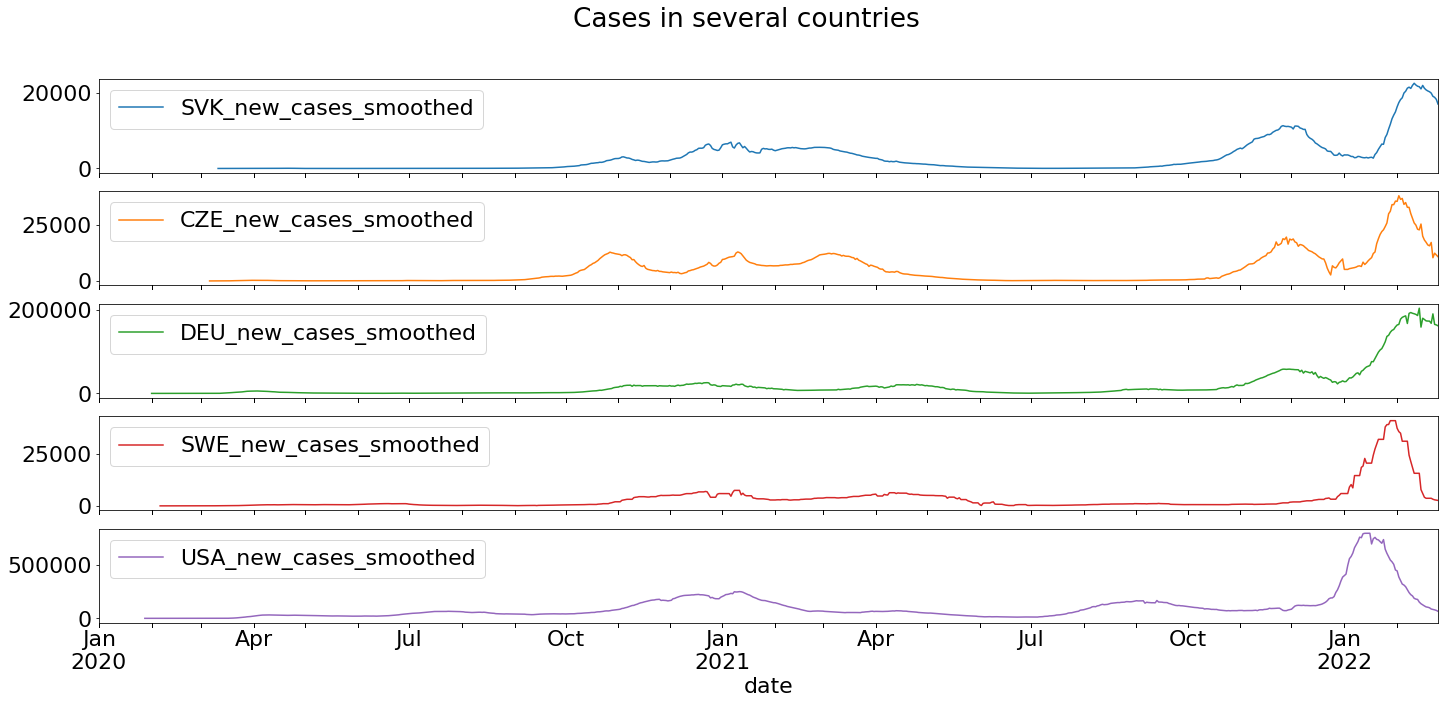

In [228]:
countries_combined.plot(
    y=[ code + "_new_cases_smoothed" for code in country_codes    ],
    figsize=(24, 10),
    xticks=countries_combined.index.strftime('%m-%Y'),
    subplots=True,
    title="Cases in several countries"
)


array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>], dtype=object)

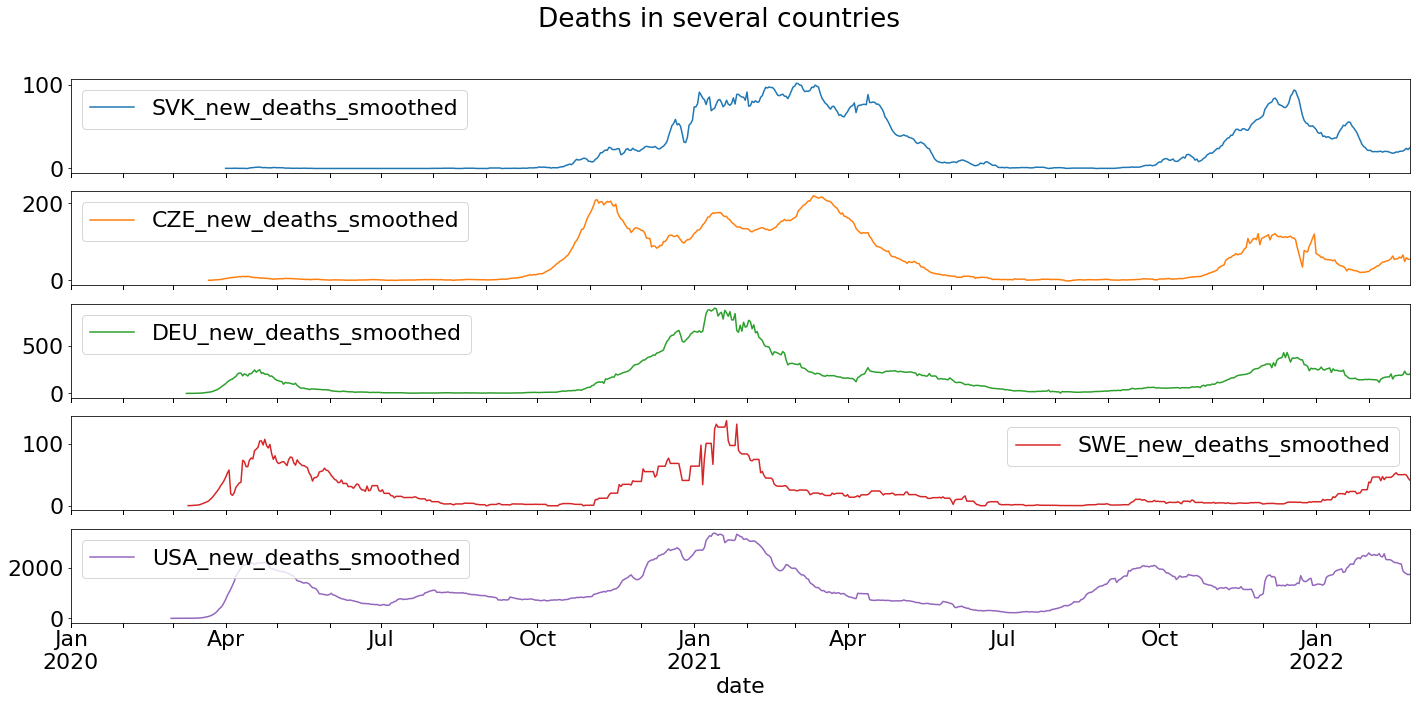

In [229]:
countries_combined.plot(
    y=[code + "_new_deaths_smoothed" for code in country_codes],
    figsize=(24, 10),
    xticks=countries_combined.index.strftime('%m-%Y'),
    subplots=True,
    title="Deaths in several countries"
)


<AxesSubplot:title={'center':'Cases in several countries'}, xlabel='date'>

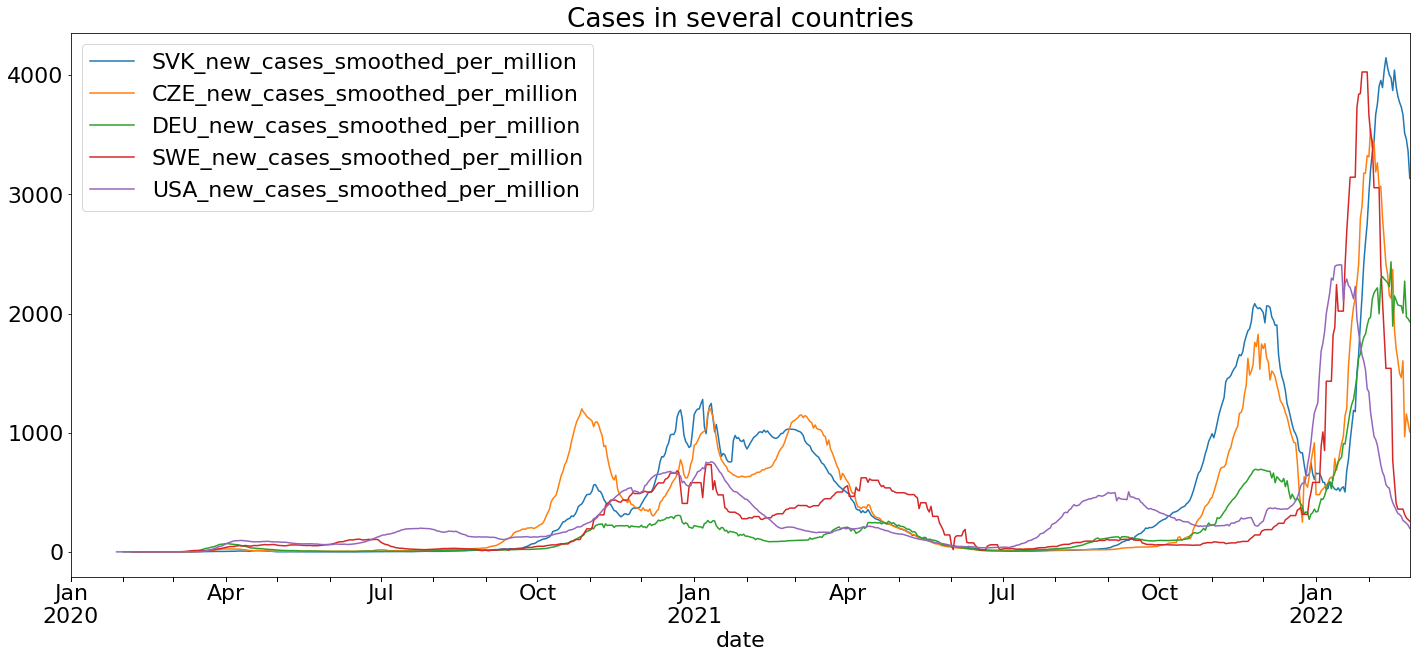

In [230]:
countries_combined.plot(
    y=[code + "_new_cases_smoothed_per_million" for code in country_codes],
    figsize=(24, 10),
    xticks=countries_combined.index.strftime('%m-%Y'),
    subplots=False,
    title="Cases in several countries"
)


<AxesSubplot:title={'center':'Deaths per million in several countries'}, xlabel='date'>

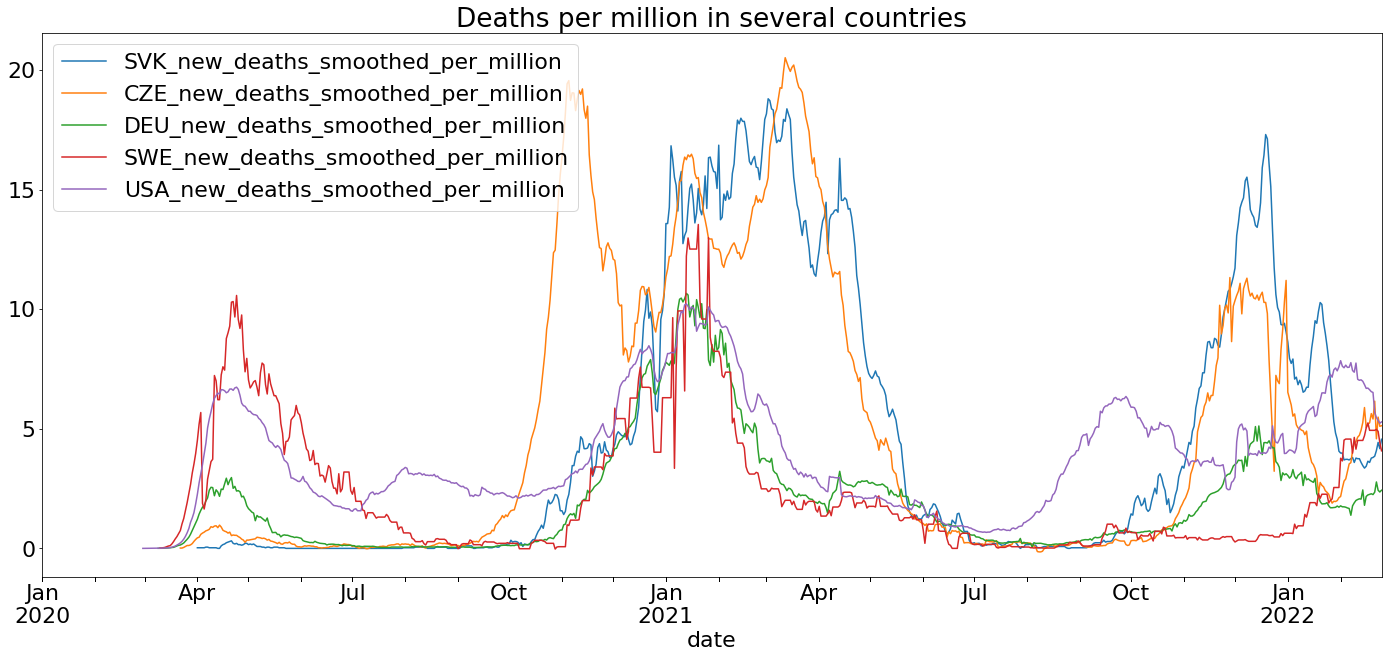

In [231]:
countries_combined.plot(
    y=[ code + "_new_deaths_smoothed_per_million" for code in country_codes ],
    figsize=(24, 10),
    xticks=countries_combined.index.strftime('%m-%Y'),
    subplots=False,
    title="Deaths per million in several countries"
)



<AxesSubplot:title={'center':'Celkový počet úmrtí na milión obyvateľov vo viacerých krajinách'}, xlabel='date'>

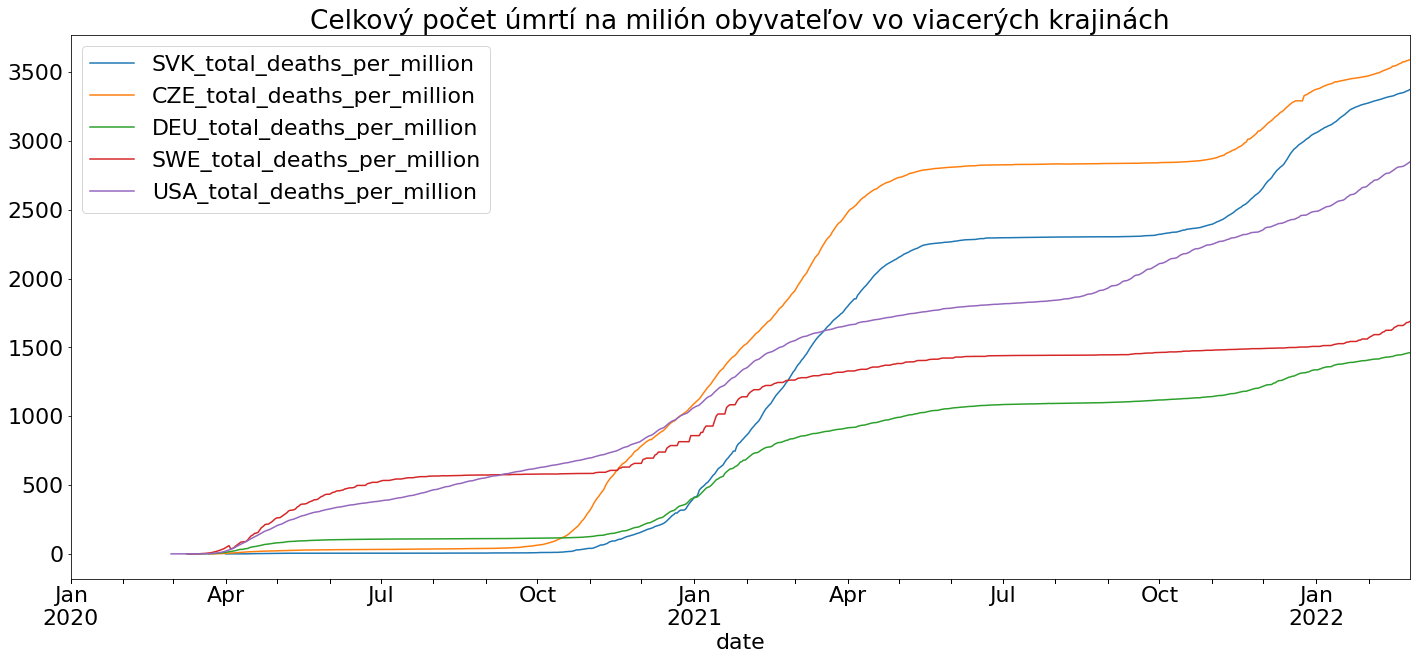

In [232]:
countries_combined.plot(
    y=[ code + "_total_deaths_per_million" for code in country_codes ],
    figsize=(24, 10),
    xticks=countries_combined.index.strftime('%m-%Y'),
    subplots=False,
    title="Celkový počet úmrtí na milión obyvateľov vo viacerých krajinách"
)



<AxesSubplot:title={'center':'Celkový počet prípadov na milión obyvateľov vo viacerých krajinách'}, xlabel='date'>

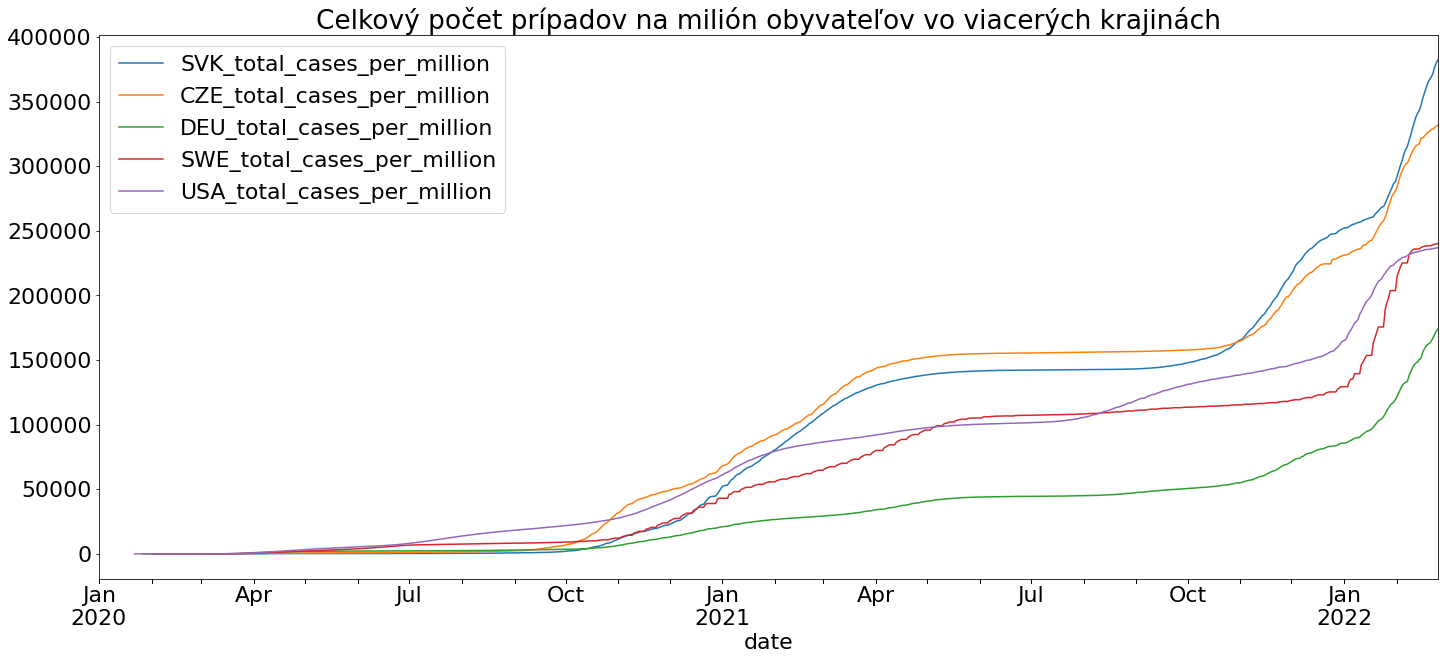

In [233]:
countries_combined.plot(
    y=[ code + "_total_cases_per_million" for code in country_codes ],
    figsize=(24, 10),
    xticks=countries_combined.index.strftime('%m-%Y'),
    subplots=False,
    title="Celkový počet prípadov na milión obyvateľov vo viacerých krajinách"
)



<AxesSubplot:title={'center':'Úmrtnosť - počet celkových úmrtí / počet celkových prípadov'}, xlabel='date'>

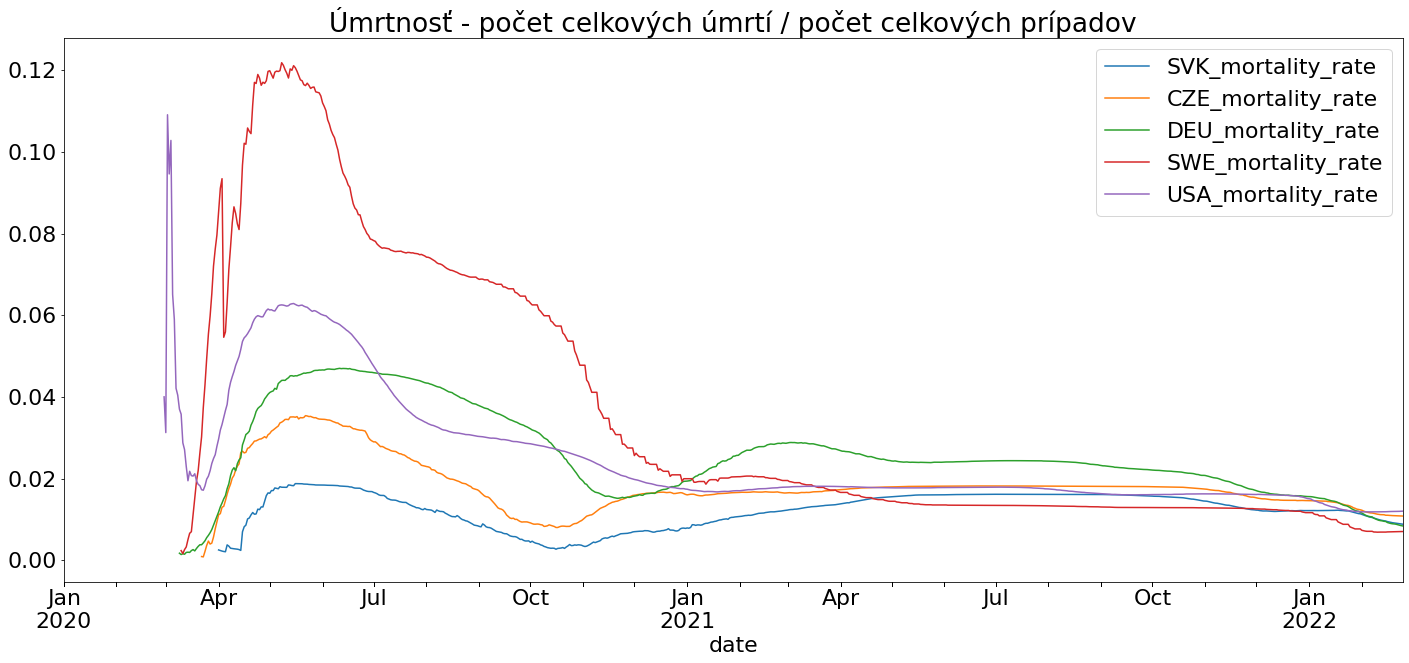

In [234]:
countries_combined.plot(
    y=[ code + "_mortality_rate" for code in country_codes ],
    figsize=(24, 10),
    xticks=countries_combined.index.strftime('%m-%Y'),
    subplots=False,
    title="Úmrtnosť - počet celkových úmrtí / počet celkových prípadov"
)

